## Data Analysis Masters Capstone - Course-end Project 3

### Cardiovascular Disease prediction - Data analysis, EDA, and logistic regression modeling

#### Problem statement
Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

#### Preliminary analysis
1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates etc.
2. Based on the findings from the previous question remove duplicates (if any) , treat missing values using appropriate strategy.
 
#### Informative report
* Prepare an informative report about the data explaining distribution of the disease and the related factors. You could use the below approach to achieve the objective
    1. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
    2. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
    3. Study the occurrence of CVD across Age.
    4. Study the composition of overall patients w.r.t . Gender.
    5. Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?
    6. Describe the relationship between Cholesterol levels and our target variable.
    7. What can be concluded about the relationship between peak exercising and occurrence of heart attack.
    8. Is thalassemia a major cause of CVD?
    9. How are the other factors determining the occurrence of CVD?
    10. Use a pair plot to understand the relationship between all the given variables.


* Build a baseline model to predict using a Logistic Regression and explore the results.



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
#Read the file to using pandas(pd)

data =pd.read_excel(r"C:\Users\padma\Data analytics\Fortray\Capstone Projects\CapstoneProject3\3\data.xlsx")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Display the Missing Values

print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#No null values identified, clean data...

In [10]:
#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

<Axes: xlabel='sex_label', ylabel='count'>

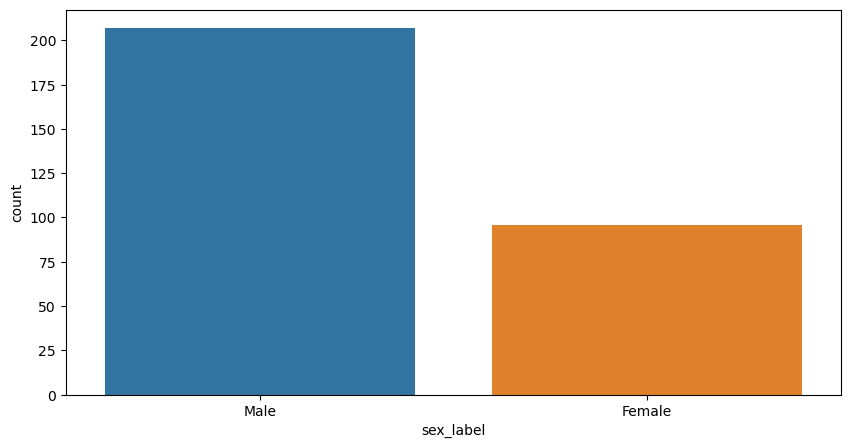

In [28]:
plt.figure(figsize = (10,5))
data['sex_label'] = data['sex'].map({0: 'Female', 1: 'Male'})
sns.countplot(data, x="sex_label")


<Axes: xlabel='cp', ylabel='count'>

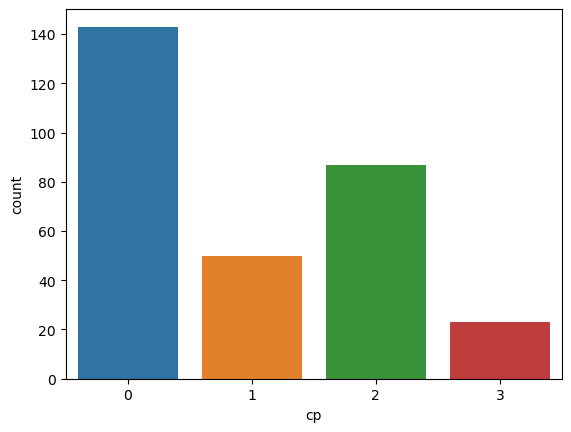

In [15]:

sns.countplot(data, x="cp")

<Axes: xlabel='fbs_label', ylabel='count'>

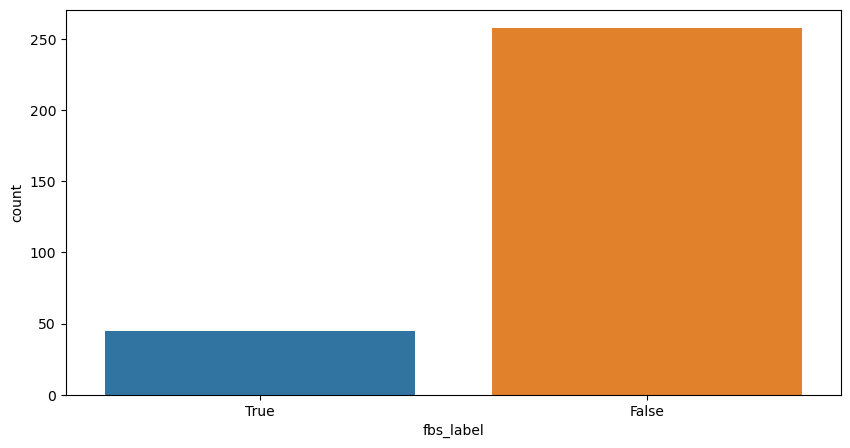

In [30]:
plt.figure(figsize = (10,5))
data['fbs_label'] = data['fbs'].map({0: 'False', 1: 'True'})

sns.countplot(data, x = "fbs_label")

<Axes: xlabel='restecg', ylabel='count'>

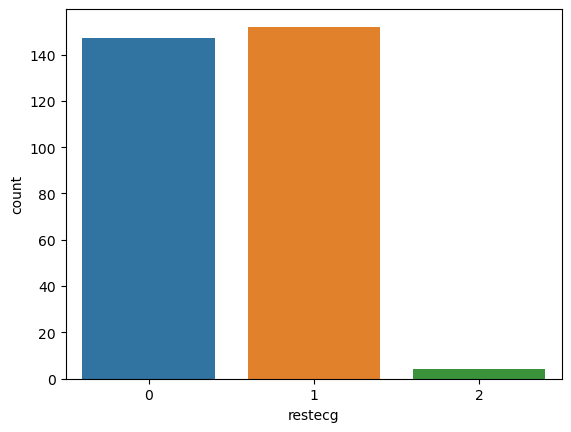

In [17]:
sns.countplot(data, x = "restecg")

In [18]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='exang_label', ylabel='count'>

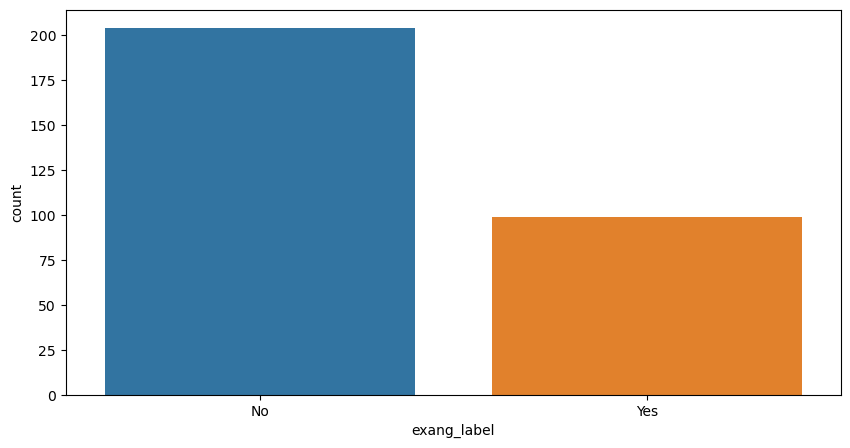

In [31]:
plt.figure(figsize = (10,5))
data['exang_label'] = data['exang'].map({0: 'No', 1: 'Yes'})
sns.countplot(data, x = "exang_label")

<Axes: xlabel='slope', ylabel='count'>

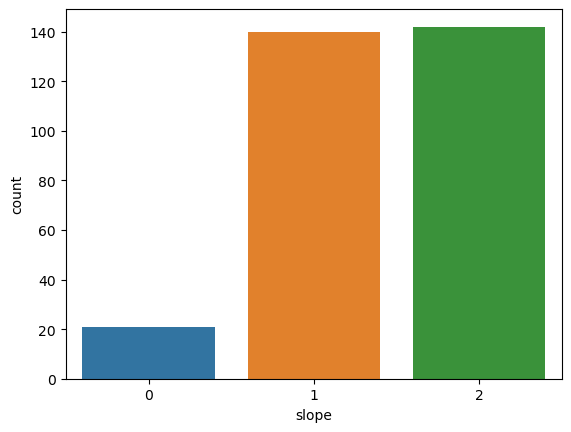

In [20]:
sns.countplot(data, x = "slope")

<Axes: xlabel='ca', ylabel='count'>

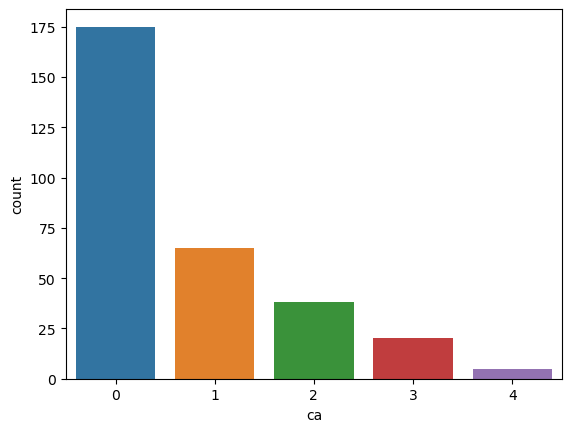

In [21]:
sns.countplot(data, x = "ca")

In [33]:
data['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='count'>

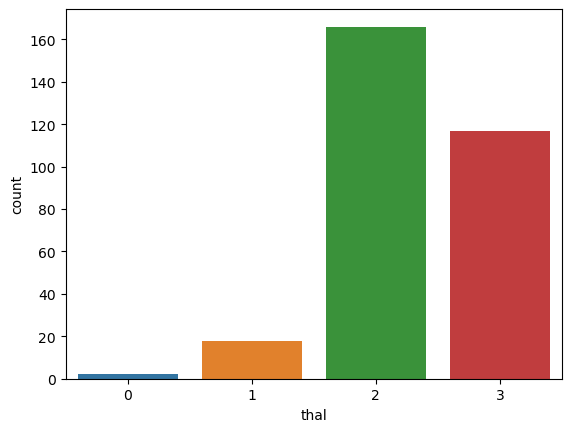

In [22]:
sns.countplot(data, x = "thal")

<Axes: xlabel='target', ylabel='count'>

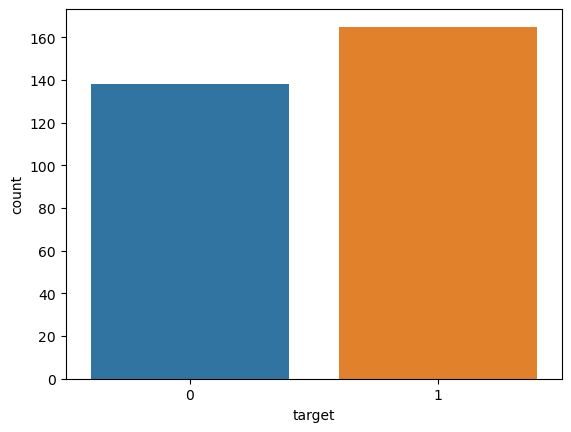

In [23]:
sns.countplot(data, x = "target")

Lets see if theirs a good proportion between our positive & negative binary predictor.

In [20]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Study the occurrence of CVD across Age

<Axes: xlabel='age', ylabel='Count'>

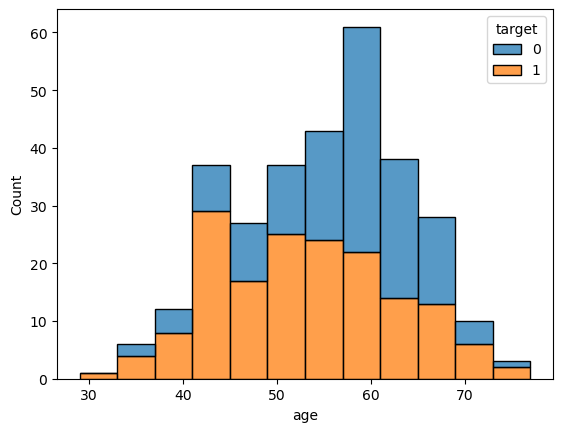

In [38]:
sns.histplot(x = 'age', data = data, hue = 'target', multiple='stack')

In [39]:
# It looks like Heart attacks are more common in older age groups

### Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?

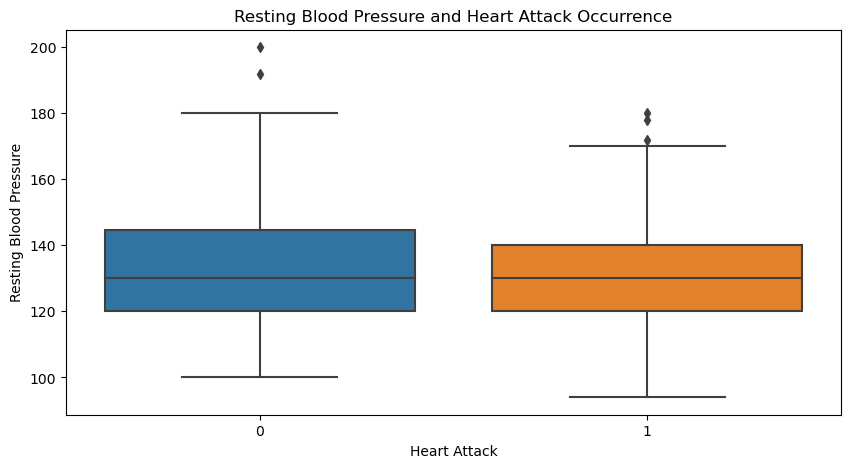

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'target', y = 'trestbps', data = data)
plt.xlabel('Heart Attack')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure and Heart Attack Occurrence')
plt.show()

### Describe the relationship between Cholesterol levels and our target variable.

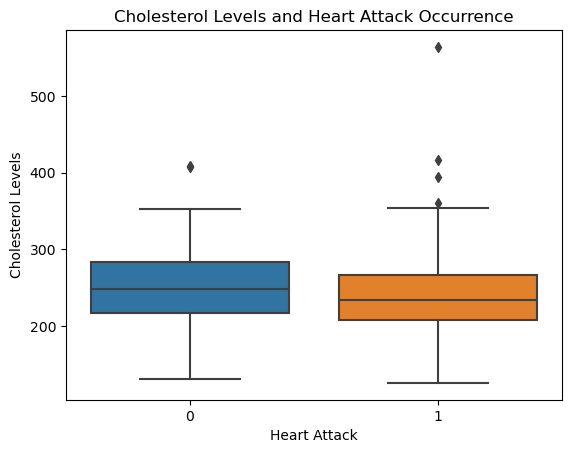

In [45]:
sns.boxplot(x='target', y='chol', data=data)
plt.xlabel('Heart Attack')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels and Heart Attack Occurrence')
plt.show()

### What can be concluded about the relationship between peak exercising and occurrence of heart attack.

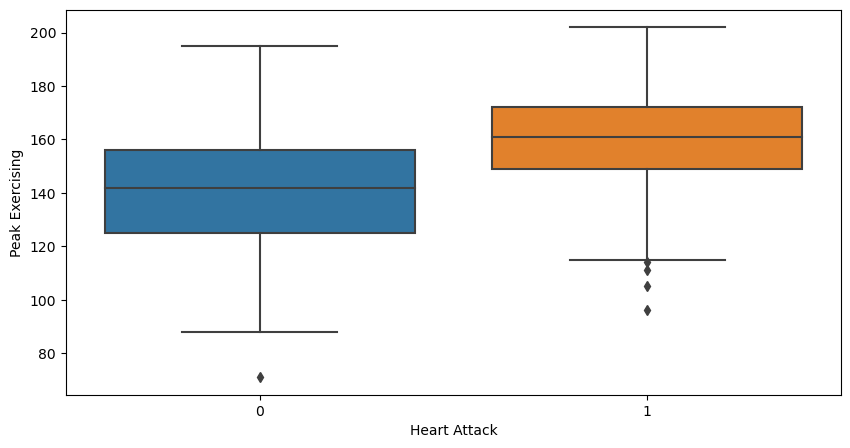

In [49]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'target', y = 'thalach', data = data)
plt.xlabel('Heart Attack')
plt.ylabel('Peak Exercising')
plt.show()

### Is thalassemia a major cause of CVD?

<Axes: xlabel='thal', ylabel='count'>

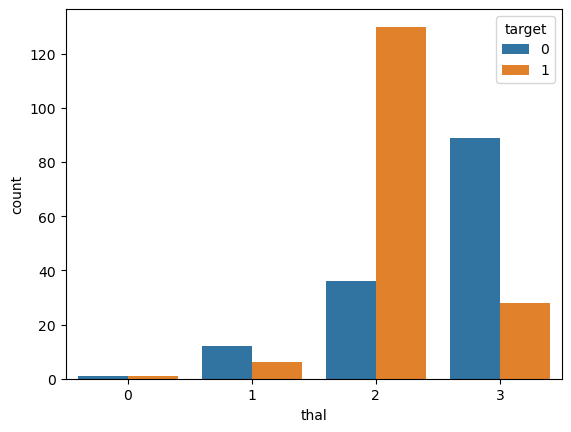

In [51]:
sns.countplot(x = 'thal', hue = 'target', data = data)

### How are the other factors determining the occurrence of CVD?

C:\Users\padma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


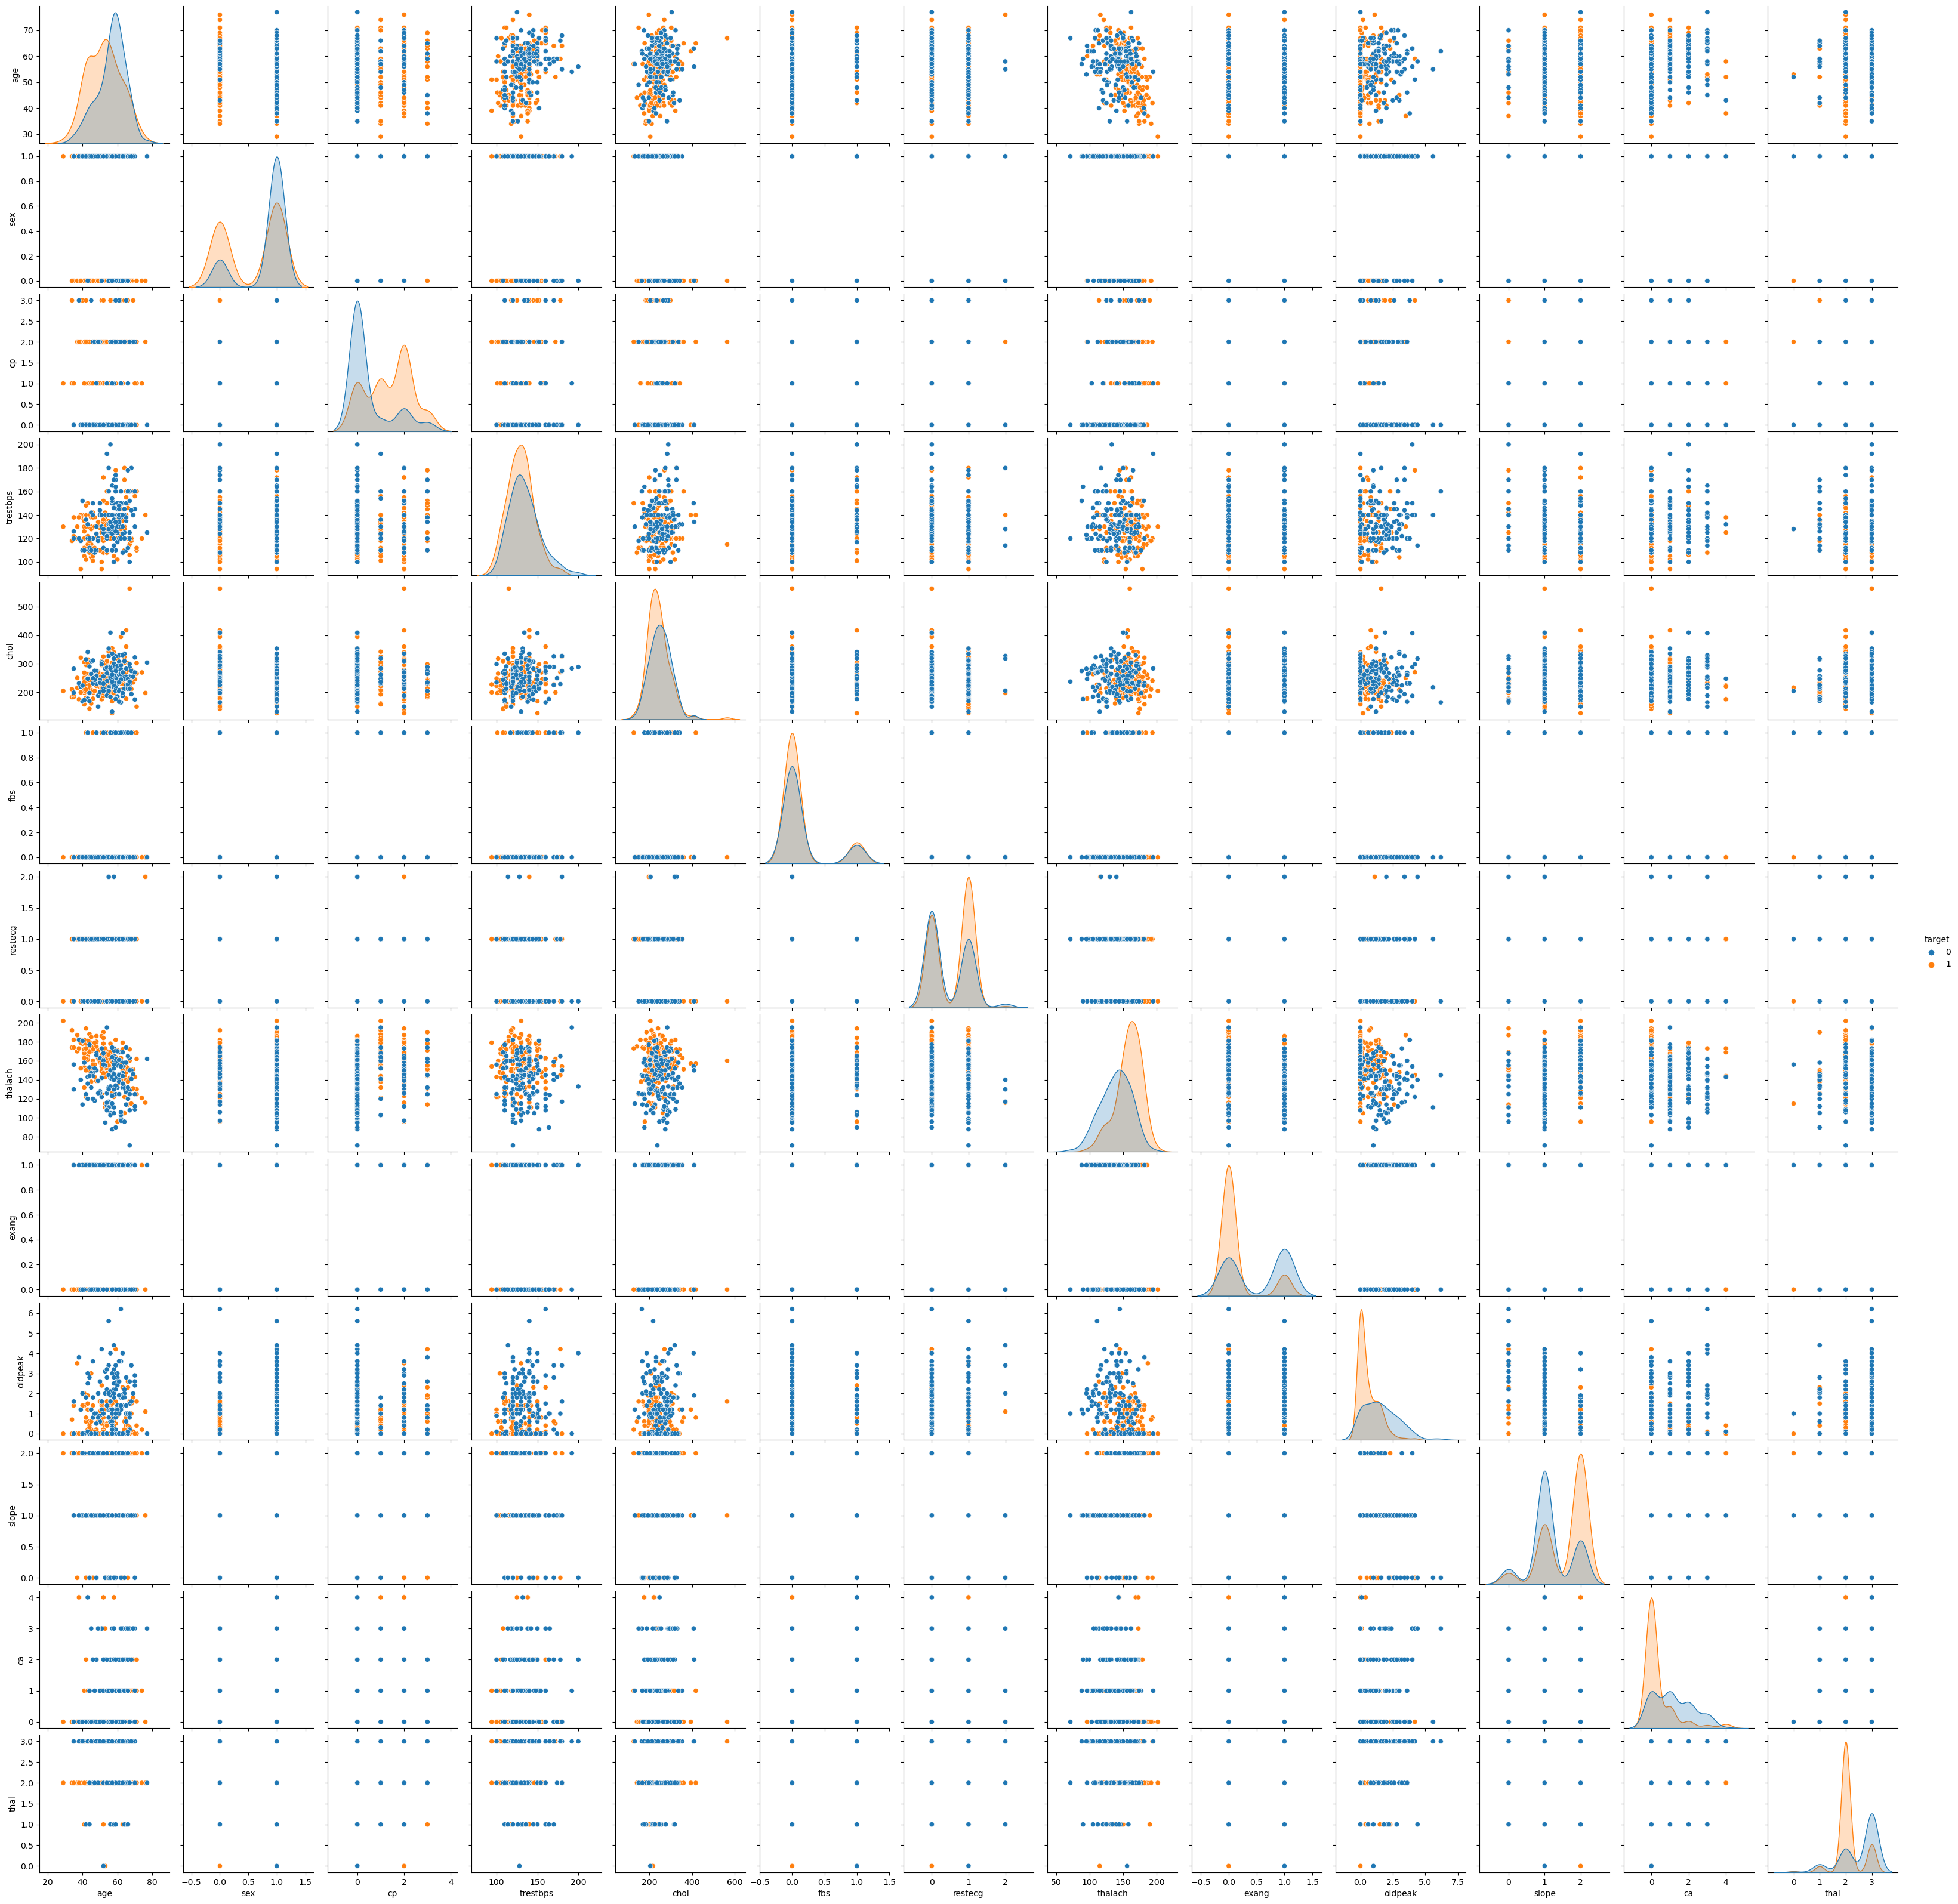

In [54]:
sns.pairplot(data, hue = 'target')

**Correlation Matrix**- let’s you see correlations between all variables.

Within seconds, you can see whether something is positively or negatively correlated with our predictor (target).

<Axes: >

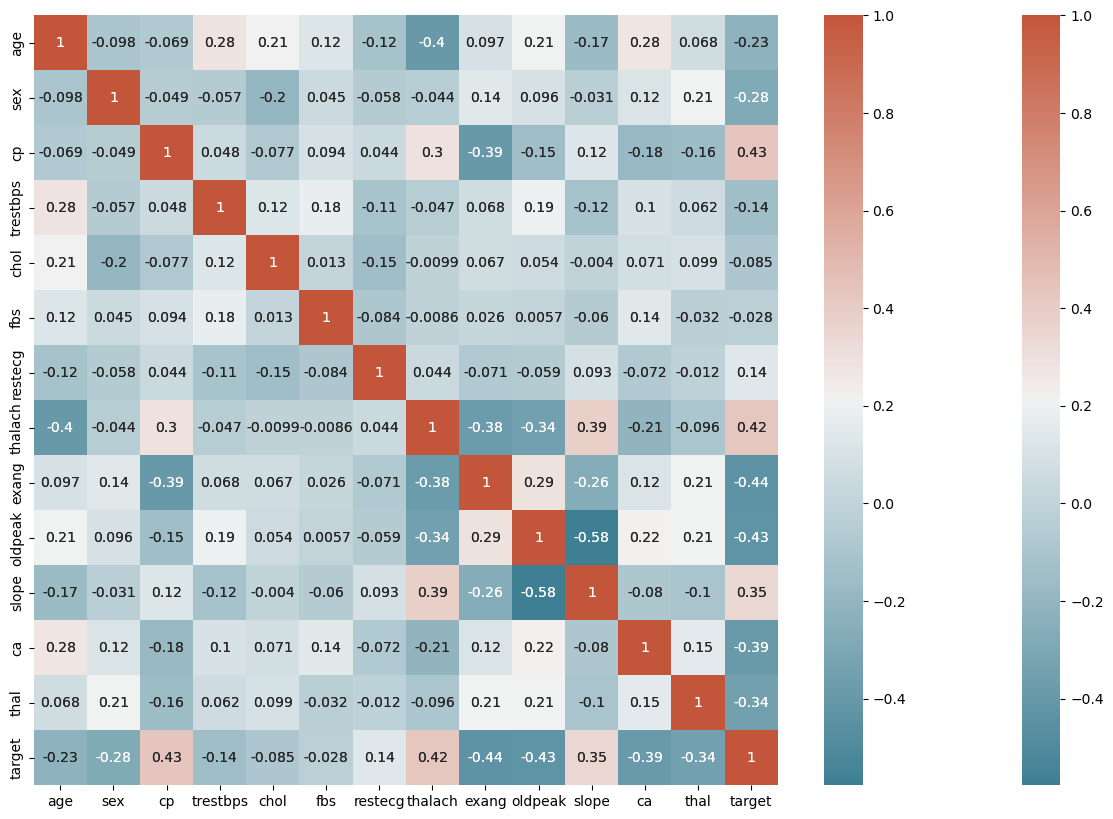

In [21]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

*We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.*

*In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.*

C:\Users\padma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


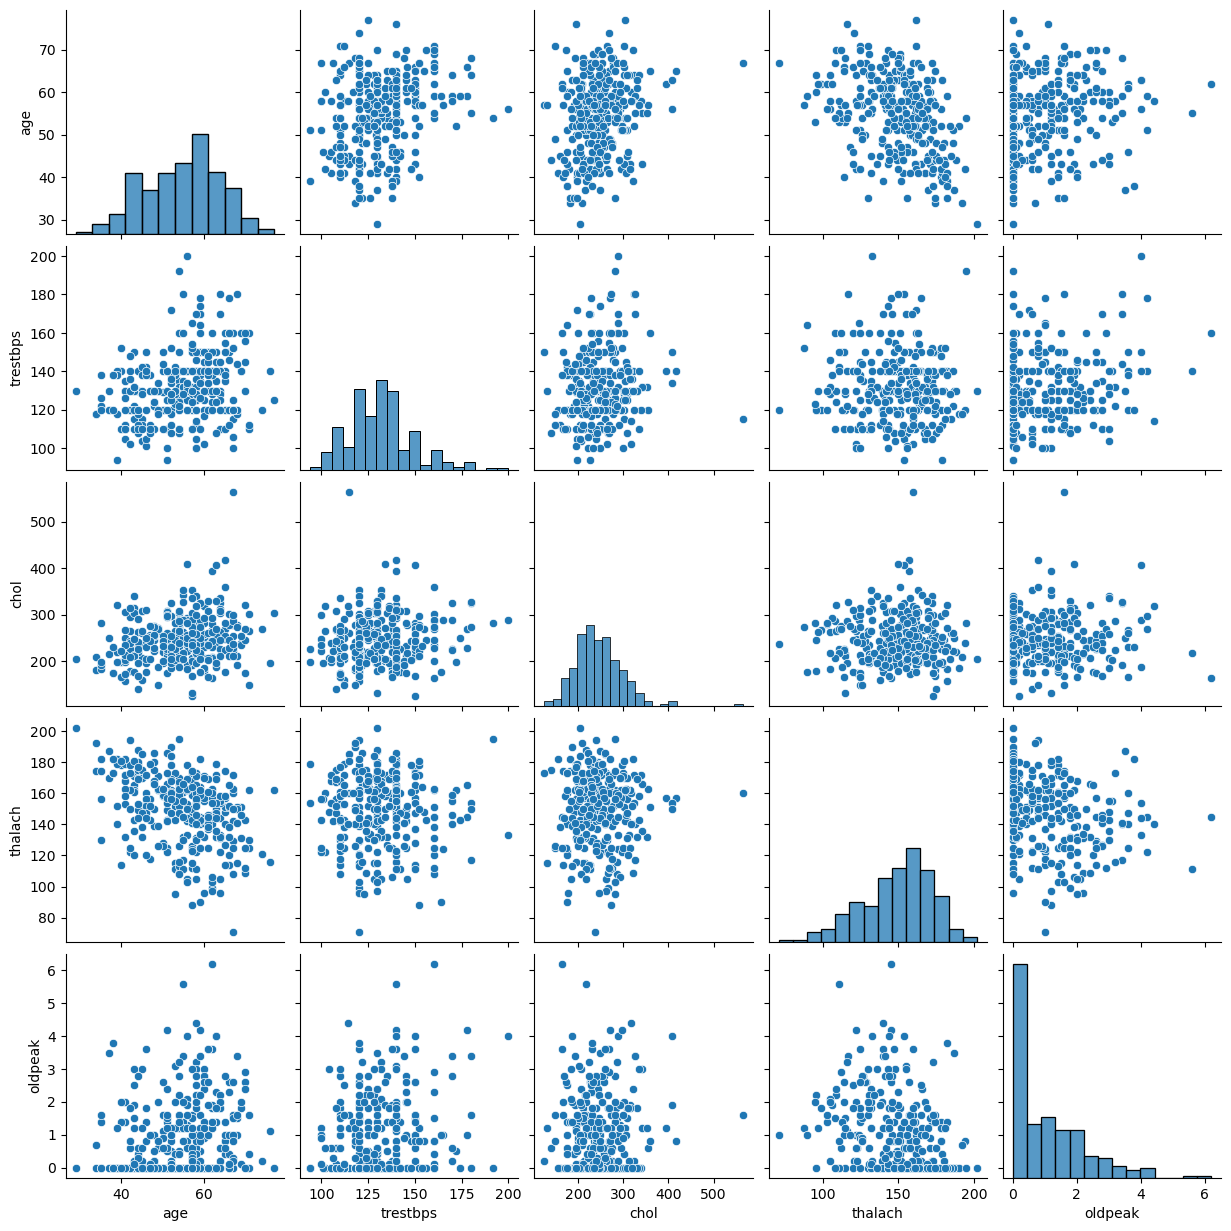

In [22]:
# Using pairplots to see the continuous columns variable correlation

subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Making a smaller pairplot with only the continuous variables, to dive deeper into the relationships. Also a great way to see if theirs a positive or negative correlation!

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [58]:
# Define blood pressure anomalies based on standard thresholds
data['bp_anomaly'] = data['trestbps'].apply(lambda x: 1 if x >= 140 or x < 90 else 0)
# Prepare data for modeling (including 'bp_anomaly' as a feature)
X = data[['trestbps', 'bp_anomaly']]
y = data['target']

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [61]:
# Predictions
y_pred = model.predict(X_test)


In [63]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16 13]
 [11 21]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        29
           1       0.62      0.66      0.64        32

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.61        61



#### Statistical Testing:

T-test: If the p-value is low, it indicates a significant difference in resting blood pressure between the two groups.
Chi-squared Test: A low p-value suggests a significant association between blood pressure anomalies and heart attack occurrences.
Logistic Regression:

Model Performance: Indicates how well resting blood pressure anomalies can predict heart attacks. High performance would suggest a strong relationship.